# 作业1:无穷嵌套的根式

2025-9-03

### 导入相关的库

In [1]:
import numpy as np # 数值计算库
import numba as nb # 引入 jit 来加速函数
import sympy as sym # 符号计算库
import matplotlib.pyplot as plt # 图像绘制
import ipywidgets as ipw # 交互控件

# 使用 mathjax 来在 jupyter notebook 显示数学公式
sym.init_printing(use_latex='mathjax')

# 设置 matplotlib 绘制的图像嵌入到 jupyter notebook
%matplotlib widget

# 设置 matplotlib 使用的字体，这里需要额外下载思源黑体
#plt.rcParams['font.sans-serif'] = ['Source Han Sans CN']
#plt.rcParams['font.sans-serif'] = ['SimHei']

这里我们先定义一个函数，其传入一个数值（或者矩阵），以及需要迭代的次数，返回指定迭代次数的根换嵌套

In [16]:
@nb.njit() # 使用 Jit 加速
def f(x, n=10):
    y = np.ones(x)
    for i in range(n):
        x += np.sqrt(x)
    return x

In [3]:
@nb.njit()
def ft(x, n=100):
    ans = np.zeros((n+1, len(x)))
    xt = np.arange(n+1)
    ans[0] = x.copy()
    for i in range(n):
        ans[i+1] = np.sqrt(ans[i])
    return xt, ans

interactive(children=(FloatSlider(value=1.0, description='x', max=2.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.callback(x)>

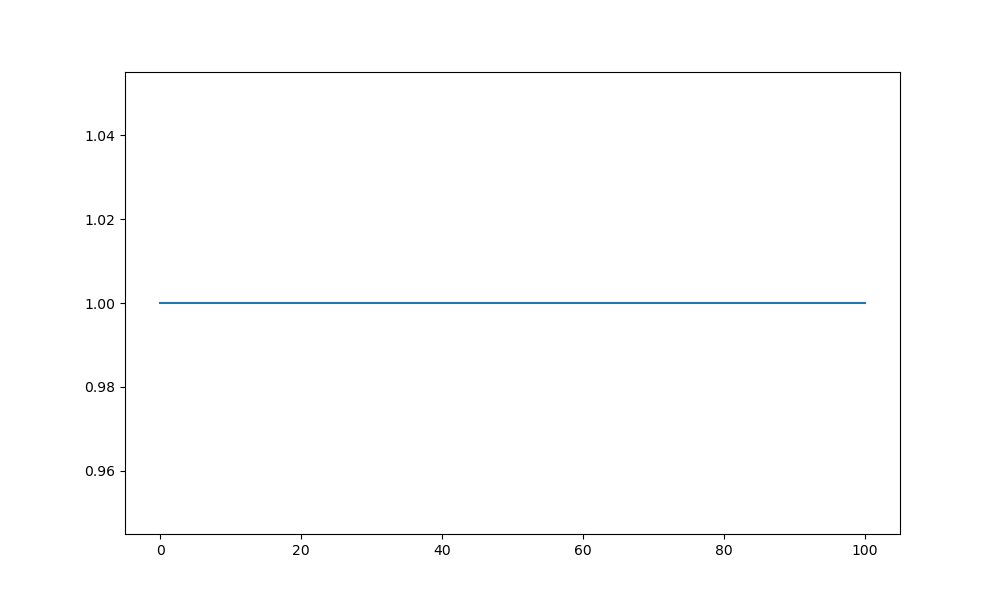

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
def callback(x):
    ax.clear()
    xt, yt = ft(np.array([x]))
    ax.plot(xt, yt)
ipw.interact(callback, x=(0, 2, 0.01))

测试代码框（导出前应该删除）